# DATA PREPARATION

Task 1 : 

Examine transaction data and customer data(Perform data preprcessing and EDA)

Data analysis and customer segments – 

look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find.


Deep dive into customer segments – 

define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.

##### Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

#### Analysis on Customer Data

In [80]:
cust_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [81]:
cust_df.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [82]:
cust_df.shape

(72637, 3)

In [83]:
cust_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [84]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [85]:
cust_df.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [86]:
cust_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [87]:
cust_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Checking for duplicate values

In [88]:
cust_df.duplicated().sum()

0

### Checking for missing values

In [89]:
cust_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Preforming graphical analysis

<AxesSubplot:title={'center':'Customers from differnet lifestages'}, xlabel='LIFESTAGE', ylabel='count'>

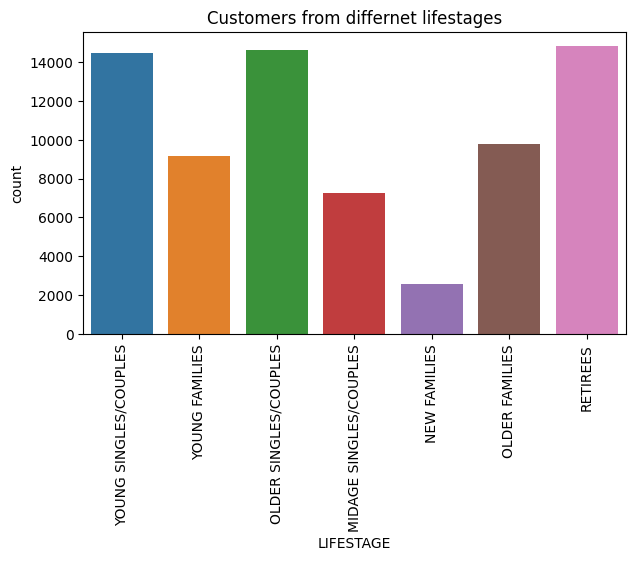

In [94]:
plt.figure(figsize=(7,4),dpi = 100)
plt.xticks(rotation = 90)
plt.ylabel('Number of Customers')
plt.title('Customers from differnet lifestages')
sea.countplot(x = 'LIFESTAGE', data = cust_df)

Most of the customers are YOUNG SINGLES/COUPLES, OLDER SINGLES/COUPLES and RETIREES

In [95]:
cust_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Number of Customers')

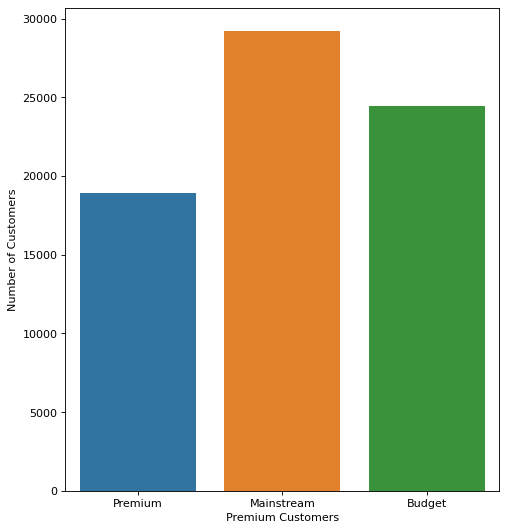

In [56]:
plt.figure(figsize=(7,8), dpi= 80)
sea.countplot(x = 'PREMIUM_CUSTOMER', data = cust_df)
plt.xlabel('Premium Customers')
plt.ylabel('Number of Customers')

### SECOND DATASET (Transaction Data)

In [101]:
tran_df = pd.read_excel('QVI_transaction_data.xlsx')

In [32]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [35]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [102]:
# Dates
import datetime
from matplotlib.dates import DateFormatter


In [41]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [29]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [98]:
#Function to change date format

# Function that converts Excel integer into yyyy-mm-dd format
def xldate_to_date(properdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(properdate < 60):
        delta_in_days = datetime.timedelta(days = (properdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (properdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date
    

In [103]:
tran_df['DATE'] = tran_df['DATE'].apply(xldate_to_date)

In [ ]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,Tostitos


In [56]:
tran_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [57]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [104]:
tran_df.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [105]:
tran_df.duplicated().sum()

1

In [106]:
tran_df.drop_duplicates(inplace=True)

In [107]:
tran_df.duplicated().sum()

0

In [108]:
tran_df['STORE_NBR'].value_counts().head()

226    2022
88     1873
93     1832
165    1819
237    1785
Name: STORE_NBR, dtype: int64

<AxesSubplot:title={'center':'Total sale with respect to stores'}, xlabel='STORE_NBR', ylabel='TOT_SALES'>

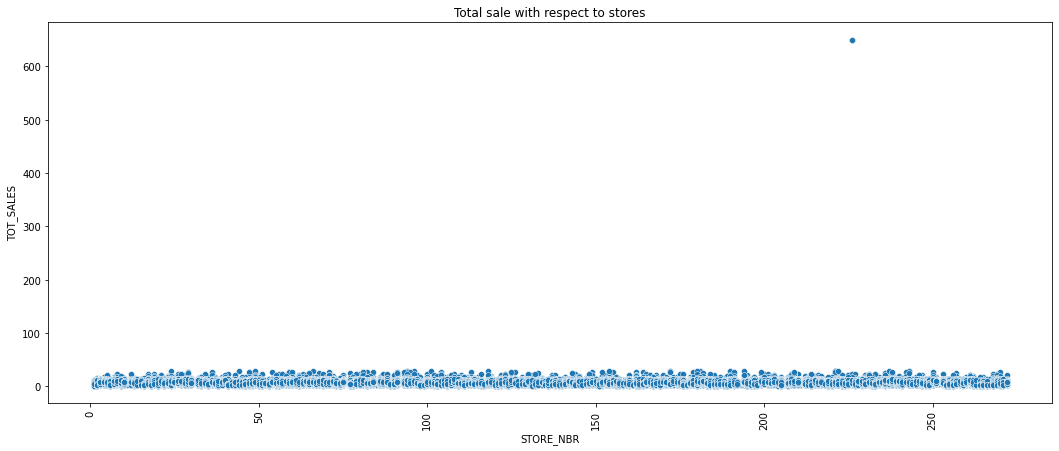

In [110]:
plt.figure(figsize=(18,5))
plt.xticks(rotation = 90)
plt.title('Total sale with respect to stores')
sea.scatterplot(x='STORE_NBR', y = 'TOT_SALES' ,data= tran_df, x_bins=100)

From above graph we can see there is one outlier having total sale near to 600

In [112]:
tran_df['PROD_QTY'].value_counts()

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

Someone has brought 200 quantities, we need to check this customer 

In [113]:
tran_df.loc[tran_df['PROD_QTY'] == 200 , :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


lets check if this customer has made any other pucrchases

In [22]:
tran_df.loc[tran_df['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


customer with loyalty car number 226000 has made only a one time purchase so we can drop this entry 

In [114]:
tran_df.drop(tran_df.index[tran_df['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [124]:
plt.figure(figsize=(100,20), dpi = 200)
plt.xticks(rotation = 90)
plt.grid('whitegrey')
plt.xlabel('Store Number')
plt.ylabel('Total sales')
plt.title('Total Sales made by every store')
sea.countplot(x='STORE_NBR' ,data= tran_df)

<AxesSubplot:title={'center':'Total Sales made by every store'}, xlabel='STORE_NBR', ylabel='count'>

<AxesSubplot:xlabel='STORE_NBR', ylabel='LYLTY_CARD_NBR'>

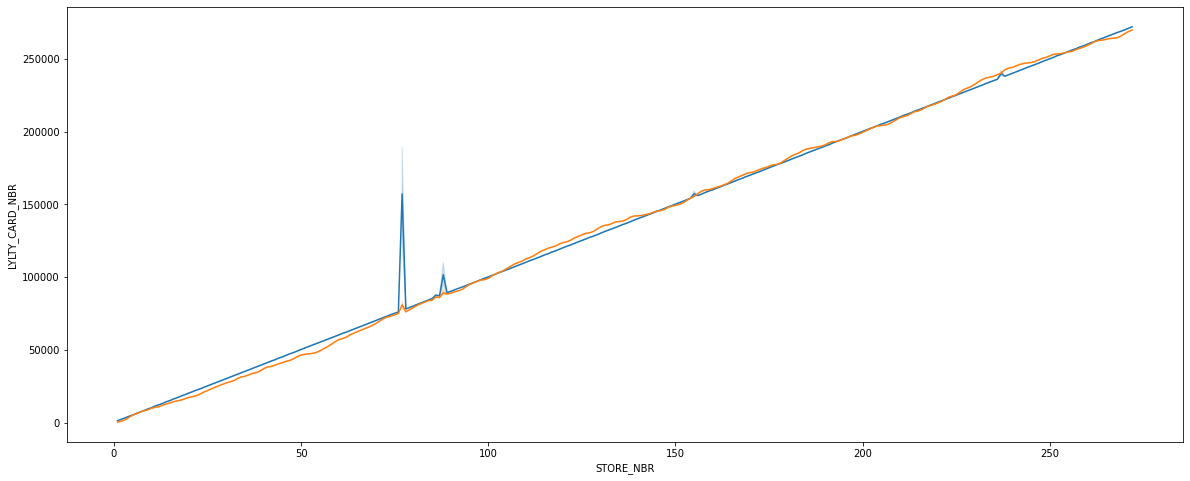

In [130]:
plt.figure( figsize= (20,8))
sea.lineplot(x = 'STORE_NBR', y = 'LYLTY_CARD_NBR' ,data = tran_df)
sea.lineplot(x = 'STORE_NBR', y = 'TXN_ID' ,data = tran_df)

From above graphs we can observe :
1. Most of sales were made bt store number 40,43,88,93,165,237,226 ,they have more than 1750 sales.
2. Avegrage most stores make more than 500 sales.

<AxesSubplot:xlabel='PROD_NAME', ylabel='count'>

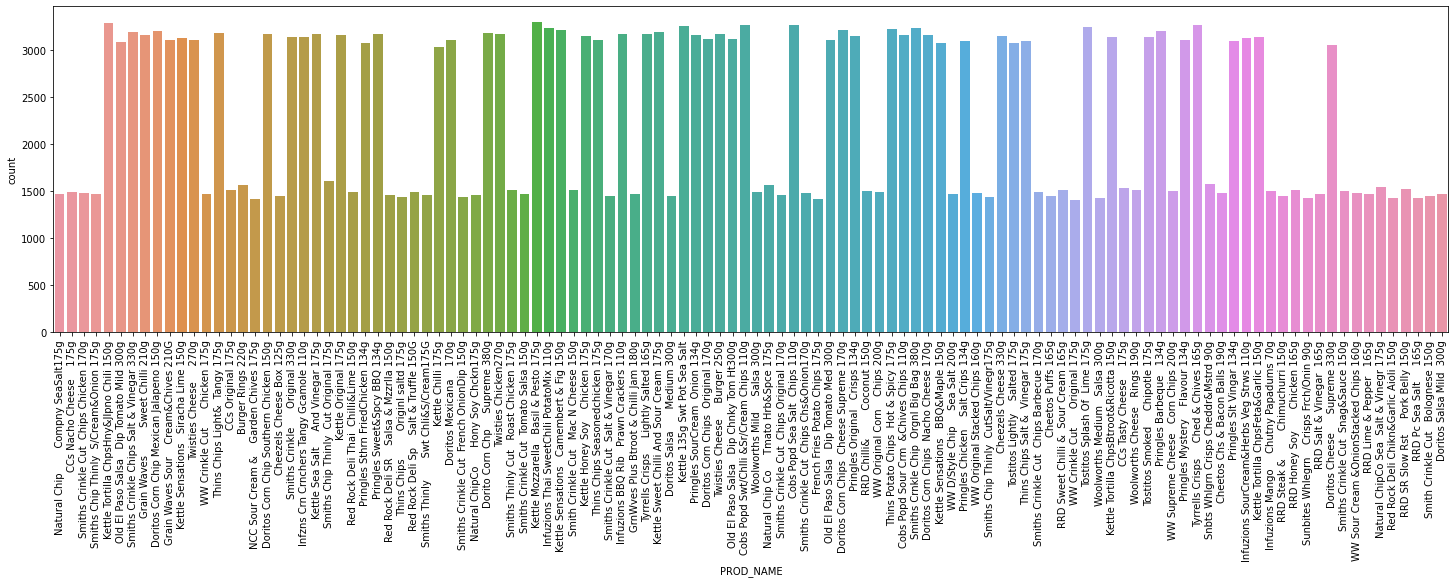

In [123]:
plt.figure(figsize=(25,6))
plt.xticks(rotation = 90)
# sea.set_theme(style="white")
sea.countplot(x='PROD_NAME' ,data= tran_df)

<AxesSubplot:xlabel='PROD_QTY', ylabel='count'>

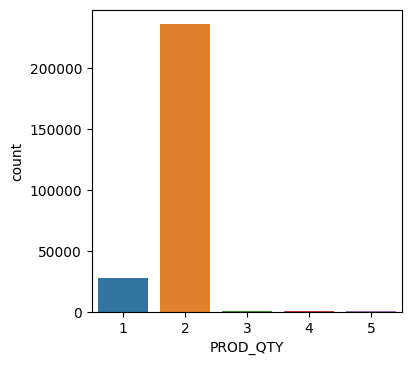

In [127]:
plt.figure(figsize=(4,4), dpi =100)
sea.countplot(x='PROD_QTY', data= tran_df)

In [27]:
tran_df['DATE'].nunique()
# Here one date is missing

364

In [30]:
# lets see which date is missing
tran_df['DATE'].describe()

/var/folders/t2/rmz95mmx5d1g6v9gz0g74x7r0000gn/T/ipykernel_911/364009672.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tran_df['DATE'].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [31]:
pd.date_range(start = '2018-07-01' , end = '2019-06-30').difference(tran_df['DATE'])
# missing date is christmas

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

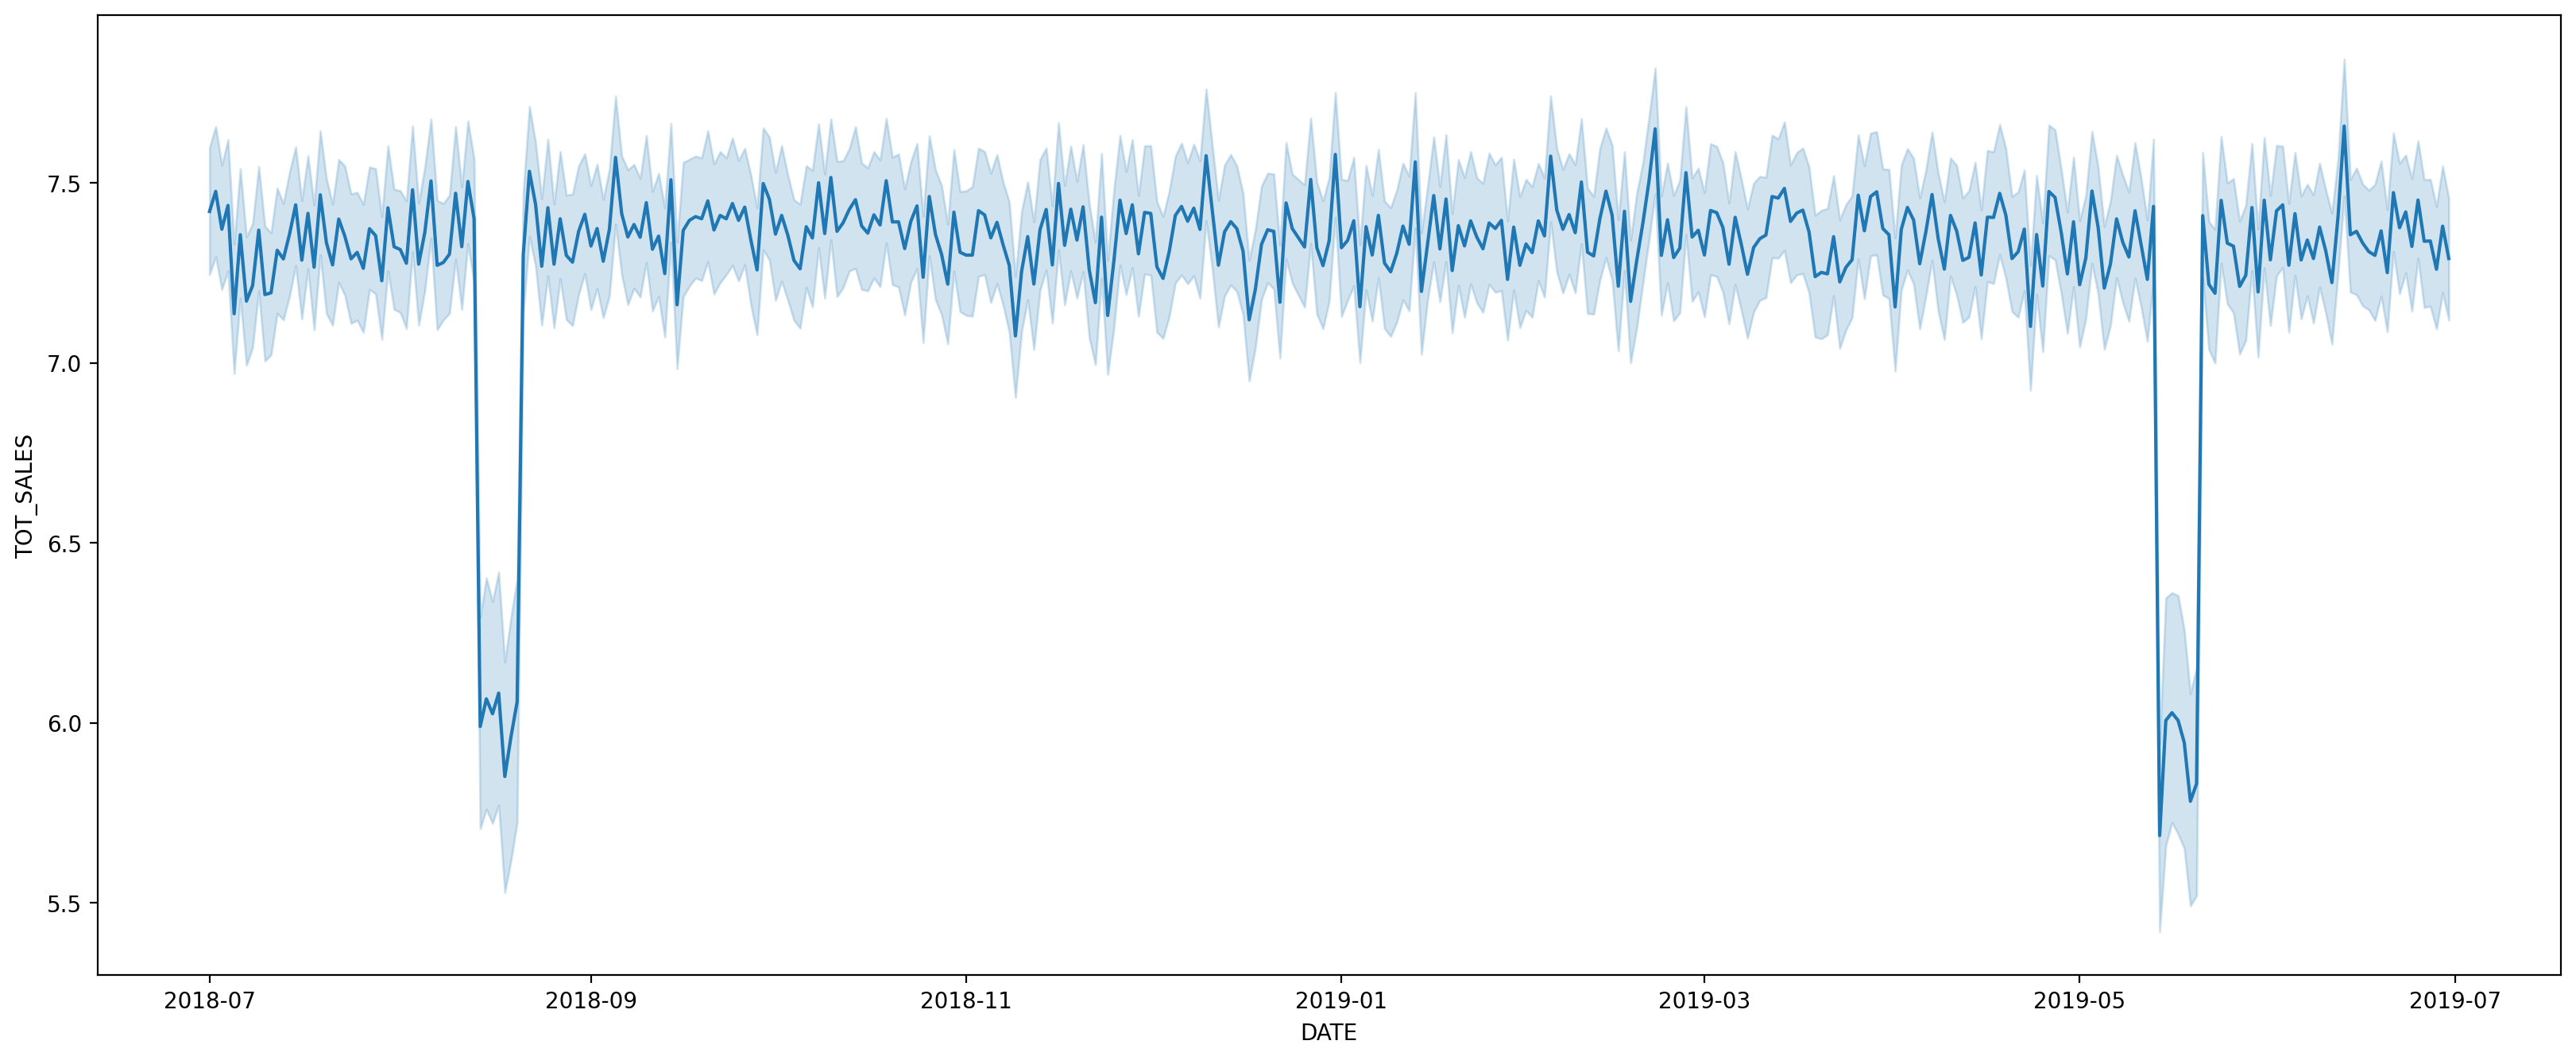

In [38]:
plt.figure( figsize= (20,8), dpi = 200)
sea.lineplot(x = 'DATE', y = 'TOT_SALES' ,data = tran_df)

# MERGE DATA

In [57]:
merge_df = pd.merge(tran_df, cust_df)

In [59]:
merge_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [60]:
merge_df.shape

(264834, 10)

In [61]:
merge_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [62]:
merge_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [63]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [67]:

sales = pd.DataFrame(merge_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             80658.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

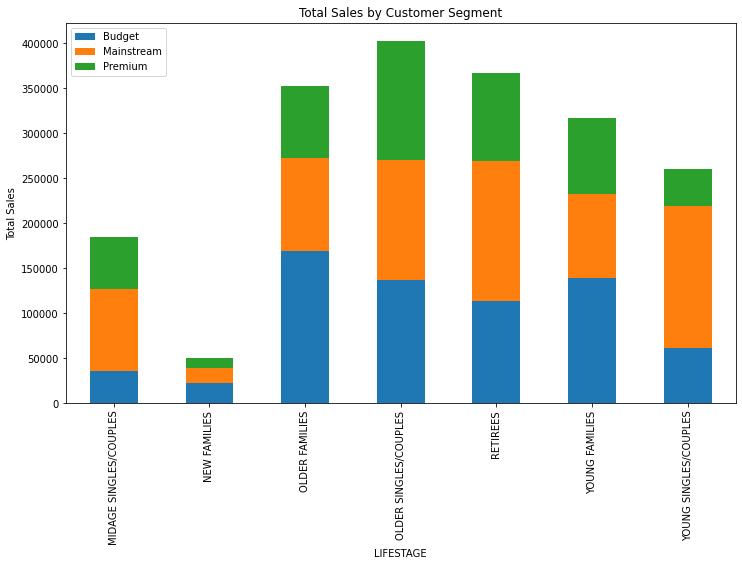

In [69]:
salesPlot = pd.DataFrame(merge_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)